In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


In [8]:
# make_regression()
bias = 100
X,y, coef= make_regression(n_features=1, bias=bias,noise=10 ,random_state=42, coef=True)

In [5]:
X.shape, y.shape

((100, 1), (100,))

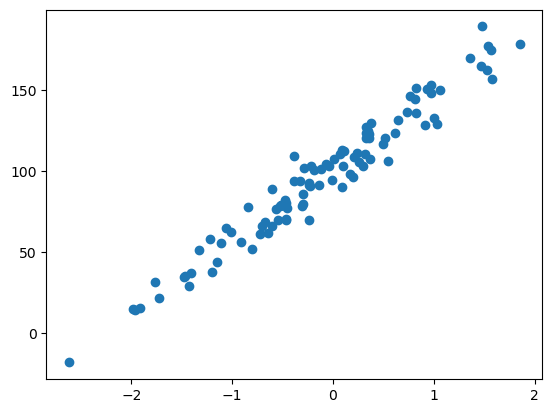

In [9]:
plt.scatter(X, y)

In [12]:
coef, bias # m and c from sklearn

(array(41.74110031), 100)

In [13]:
y_gen = X * coef + bias # line eqn

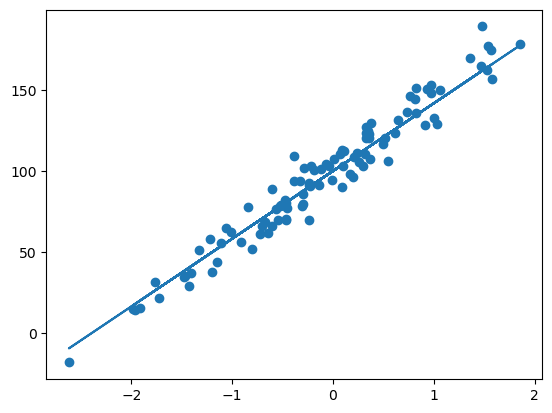

In [15]:
plt.scatter(X,y)
plt.plot(X, y_gen)

In [16]:
# plot a line using linear regression.

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [22]:
model.fit(X,y)
# training of m and c occurs here i.e coef and interecept(bias) 

LinearRegression()

In [24]:
model.coef_, model.intercept_

(array([44.43716999]), 101.16511532052698)

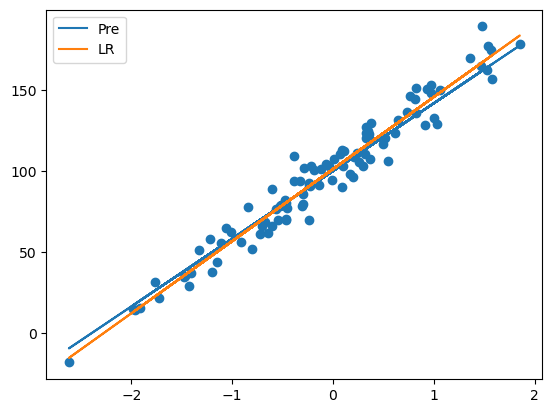

In [25]:
plt.scatter(X,y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="LR")
plt.legend()

In [69]:

class LinearRegCustom:
    def __init__(self, lr=0.1):
        self.lr = lr

    def fit(self, X, y):
        self._X = X
        self._y = y.reshape(-1, 1)
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        errors = []

        for i in range(50):
            self.gradient_descend()
            errors.append(self.error())

        return errors

    def gradient_descend(self):
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr

    def gradient(self):
        yh = self.predict(self._X)
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        return d_coef, d_intercept

    def predict(self, X):
        return X * self.coef_ + self.intercept_

    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).mean()


In [100]:
model = LinearRegCustom(lr=1.1)

In [101]:
errors = model.fit(X, y)

In [102]:
model.coef_, model.intercept_

(44.43716999225498, 101.16511532052698)

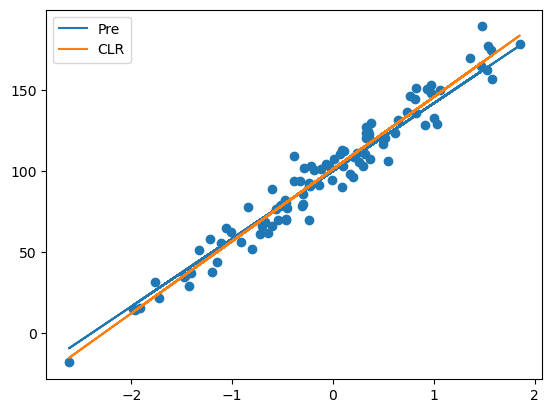

In [103]:
plt.scatter(X,y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

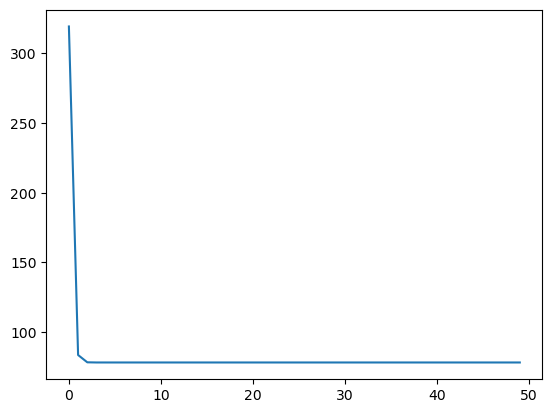

In [104]:
plt.plot(errors)

In [113]:
# # getting a better learning rate
# for i in range(1, 10):
#     model = LinearRegCustom(lr=.3 * i)
#     errors = model.fit(X, y)
    
#     plt.figure()
#     plt.title(str(i))
#     plt.plot(errors)